<a href="https://colab.research.google.com/github/sharop/CD3001B/blob/main/SEM_2/Path_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install semopy


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 19 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd64 2.24.32-4ubuntu4 [14.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail-common amd64 2.24.32-4ub

## Ejemplo de grafica

In [3]:
import pygraphviz as pgv

# Crear el grafo
G = pgv.AGraph(strict=False, directed=True)

# Agregar nodos
G.add_node("E", label="Educación")
G.add_node("I", label="Ingreso")

# Agregar arcos
G.add_edge("E", "I")

# Mostrar el grafo
G.draw("senderos.png", prog="dot")


# Ejemplo 2

Para este ejemplo, utilizaremos un conjunto de datos de la Encuesta Nacional de Salud y Nutrición de los Estados Unidos (NHANES) para investigar la relación entre la actividad física y la obesidad.

In [4]:
import pandas as pd
import numpy as np
import semopy
from semopy import Model, semplot
from sklearn.preprocessing import MinMaxScaler
from scipy import stats




In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/GTPB/PSLS20/master/data/NHANES.csv")


In [6]:
data['Gender']= (data['Gender']=="male").replace({True: 1, False: 0}) 
data['PhysActive'] = (data['PhysActive'] == "Yes").replace({True: 1, False: 0}) 
data['Obesity']=((data.Weight/((data.Height/100)**2)) >30).replace({True: 1, False: 0})

In [7]:
data = data[["Obesity","Age", "Gender", "PhysActive", "Height", "Weight"]]


A continuación, definimos las variables que vamos a utilizar en nuestro modelo y creamos una matriz de correlación para evaluar la relación entre ellas:

In [8]:

# Definimos las variables
x1 = data['Age']
x2 = data['Gender'] ##(data['Gender']=="male").replace({True: 1, False: 0}) 
x3 = data['PhysActive'] #(data['PhysActive'] == "Yes").replace({True: 1, False: 0}) 
y = data['Obesity']#((data.Weight/((data.Height/100)**2)) >30).replace({True: 1, False: 0})
# Creamos la matriz de correlación
corr = np.corrcoef([x1, x2, x3, y])


Después, definimos el modelo de senderos utilizando la notación estándar y los coeficientes de regresión a partir de la matriz de correlación:

In [9]:
# Definimos el modelo utilizando la notación estándar
model = Model('''
    Obesity ~ Age + Gender + PhysActive
    PhysActive ~ Age
''')
model.load_cov(corr)
##Age -> Obesity
#    Gender -> Obesity
#    PhysActive -> Obesity
#    Age -> PhysActive
#



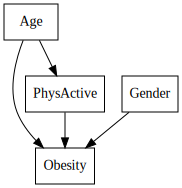

In [10]:
semopy.semplot(model, "model.png")

In [11]:
# Establecemos los coeficientes de regresión a partir de la matriz de correlación
model.parameters[0, 3] = corr[0, 3]
model.parameters[1, 3] = corr[1, 3]
model.parameters[2, 3] = corr[2, 3]
model.parameters[0, 2] = corr[0, 2]

En el modelo definido, `edad`, `genero`, y `fisicamente_activo` son las variables predictoras y `obesidad` es la variable de criterio o dependiente. Además, en el modelo se establecen las siguientes relaciones:

- `edad` tiene un efecto directo sobre `obesidad`
- `genero` tiene un efecto directo sobre `obesidad`
- `fisicamente_activo` tiene un efecto directo sobre `obesidad`
- `edad` tiene un efecto directo sobre `fisicamente_activo`

Finalmente, ajustamos el modelo y evaluamos los resultados:

In [12]:

# Escalamos los datos óptimamente
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
print(data_scaled)


[[1.         0.425      1.         0.         0.69434932 0.37121545]
 [1.         0.425      1.         0.         0.69434932 0.37121545]
 [1.         0.425      1.         0.         0.69434932 0.37121545]
 ...
 [1.         0.3375     1.         0.         0.78938356 0.41202282]
 [0.         0.75       1.         0.         0.72945205 0.33172444]
 [0.         0.75       1.         0.         0.72945205 0.33172444]]


In [13]:
# Ajustamos el modelo utilizando SEM
fit = model.fit(data, obj="MLW", solver="SLSQP")


# Evaluamos los resultados
print(model.inspect(mode='list', what="names", std_est=True))

AttributeError: ignored

In [ ]:
semopy.calc_stats(model)

semopy.semplot(model, "model.png")